# Grant Ferrel

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Project Overview

For this final project, our goal is to analyze the IMDB movie dataset using a variety of machine learning models we have learned. 

Specifically, we will attempt to perform the following functions...

**Regression**

- Build regression models using different regression algorithms. The Y value is imdb_score.
- Evaluate the models
- Scrape some new data (scoring dataset) from the website and dploy your best model and predict imdb_score for the movies in the scoring datadet. 

**Clustering**

- Analyze the data using K-means algorithm and Hierarchical clustering algorithm. You determine the optimal K value for K-means. This is exploratory data analysis and you need to report the movie "profiles" based on clustering analysis. 

**Storytelling**

- At the end, this is what your client is interested in. Develop useful insights from your models (regression, classification, and clustering). Write a summery using bulleted lists and/or numbers in markdown cells.

# 1. Business Understanding

According to a 2018 report by Grand View Research, the film and entertainment industry market was valued at 80.98 billion US dollars in 2016. While this is a staggering number and clearly demonstrates a large demand for televised entertainment, experts of this research center are still projecting continued growth of the industry through the year 2025. Given this fact, more and more film agencies are commited to serving the customers in the most effective manner in order to capitilize on the ever expanding market. 

Throughout the following analysis, it is my hope that by carfully inspecting a large collection of movies across numerous variables, we may be able to make an accurate assesment of particular film charecteristics that correlate to the films success. By conduting this analysis and successfully answering the pertainent business questions, we may better serve the existing customer base and expand the companies share of the market. Everybody wins!

# 2. Data Understanding

In this section, it is our goal to gather the required data for our analysis from data.world/popculture/imdb-5000-movie-dataset. Upon importing the data, I will be running general descriptive procedures to determine data types, missing values, quality issues, etc.

### Import Packages

In [80]:
# Import packages
import requests
from lxml import html
import csv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
sns.set(style="white", color_codes=True)
from collections import Counter

# Display all columns in dataframes
pd.set_option('display.max_columns', 500)

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from yellowbrick.regressor import ResidualsPlot

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

# Import statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

# Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

### Import Dataset for Analysis

In [2]:
# Import 'movie_metadata.csv' into dataframe labeled "movie_meta_df"
movie_df = pd.read_csv('data/movie_metadata.csv')
movie_df.head(2) # Check that all columns have been imported properly

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


### 2.1. Describe Data

In [3]:
# Check length of data frame.
len(movie_df)

5043

In [4]:
# Check shape
movie_df.shape

(5043, 28)

In [5]:
# describe data
movie_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [6]:
# check different data types
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [7]:
# check column values
movie_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

Per the above columns, we find that each of the corresponding columns outlines the following information...

### Dataset Dictionary

http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html

- **movie_title**: Title of the movie
- **duration**: Duration in minutes
- **director_name**: Name of the Director of the Movie
- **director_facebook_likes**: Number of likes of the Director on his Facebook Page
- **actor_1_name**:Primary actor starring in the movie
- **actor_1_facebook_likes**: Number of likes of the Actor_1 on his/her Facebook Page
- **actor_2_name**: Other actor starring in the movie
- **actor_2_facebook_likes**: Number of likes of the Actor_2 on his/her Facebook Page
- **actor_3_name**: Other actor starring in the movie
- **actor_3_facebook_likes**: Number of likes of the Actor_3 on his/her Facebook Page
- **num_user_for_reviews**: Number of critical reviews on imdb
- **num_critic_for_reviews**: Number of critical reviews on imdb
- **num_voted_users**: Number of people who voted for the movie. 
- **cast_total_facebook_likes**: Total number of facebook likes of the entire cast of the movie.
- **movie_facebook_likes**: Number of Facebook likes in the movie page
- **plot_keywords**: Keywords describing the movie plot
- **facenumber_in_poster**: Number of the actors who are featured in the movie poster.
- **color**: Film clorization. 'Black and White' or 'Color'
- **genres**: Film categorization like 'Animation', 'Comedy', 'Romance', 'Sci-Fi', 'Action', 'Family', etc.
- **title_year**: The year in which the movie is released (1916:2016)
- **language**: English, Arabic, Chinese, French, German, Danish, Italian, Japanese, etc.
- **country**: Country where the movie was produced
- **content_rating**: Content rating of the movie
- **aspect_ratio**: Aspect ratio the movie was made in
- **movie_imdb_link**: IMDB link of the movie
- **gross**: Gross earnings of the movie in Dollars
- **budget**: Budget of the movie in Dollars
- **imdb_score**: IMDB Score of the movie on IMDB

### 2.2 Identify Data Quality Issues

In [8]:
# check missing values
movie_df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [9]:
# Total number of missin values
miss = pd.DataFrame(movie_df.isnull().sum())
miss[0].sum()

2698

Per the above analysis, we see that there are going to be issues with missing values (2698 missing values in total). In order to correct for this issue, we need to remove missing value entries to get a more appropriate analysis Additionally, we find that many columns are categorical in nature. It will be beneficial for us to generate dummy variables for deeper analysis. 

# 3. Data Processing

Real-world datasets need to be pre-processed (e.g., cleaning, transforming) prior to formal analysis. Perform all necessary data cleaning and transformation activities. Additionally, we will look to produce dummy variables for categorical data...

### 3.1. Correct Null Values

In [10]:
# Remove the rows with missing values. This removes 1,287 rows.
movie_df = movie_df.dropna()
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

In [11]:
# check all missing values have been removed
movie_df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

### 3.2 Correct Duplicated Values

In [12]:
# Check the categories of content rating
movie_df.groupby('content_rating').size()

content_rating
Approved       17
G              87
GP              1
M               2
NC-17           6
Not Rated      34
PG            566
PG-13        1308
Passed          3
R            1700
Unrated        22
X              10
dtype: int64

In [13]:
# Convert different rating types to fit current context. (ex: M = GP = PG, x = NC-17)
movie_df = movie_df.replace({'content_rating': {'M': 'PG', 'GP': 'PG', 'X': 'NC-17'}})
movie_df.groupby('content_rating').size()

content_rating
Approved       17
G              87
NC-17          16
Not Rated      34
PG            569
PG-13        1308
Passed          3
R            1700
Unrated        22
dtype: int64

In [14]:
# Replace "Approved" & "Passed" with the most common rating "R"
movie_df = movie_df.replace({'content_rating': {'Approved': 'R', 'Passed': 'R'}})
# Convert "Not Rated" to "Unrated" to group same identifier in one category
movie_df = movie_df.replace({'content_rating': {'Not Rated': 'Unrated'}})
# Display groupby content rating
movie_df.groupby('content_rating').size()

content_rating
G            87
NC-17        16
PG          569
PG-13      1308
R          1720
Unrated      56
dtype: int64

In [15]:
# Check language for number of unique values
movie_df.groupby('language').size()

language
Aboriginal       2
Arabic           1
Aramaic          1
Bosnian          1
Cantonese        7
Czech            1
Danish           3
Dari             2
Dutch            3
English       3598
Filipino         1
French          34
German          10
Hebrew           1
Hindi            5
Hungarian        1
Indonesian       2
Italian          7
Japanese        10
Kazakh           1
Korean           5
Mandarin        15
Maya             1
Mongolian        1
None             1
Norwegian        4
Persian          3
Portuguese       5
Romanian         1
Russian          1
Spanish         23
Thai             3
Vietnamese       1
Zulu             1
dtype: int64

Considering that the vast majority of movie languages are in English, with a wide dispersion of alternative languages, meaningful results can not be drawn based on this parameter. As a result, rather than delete the column, we will consolidate language into two categories: English & Other.

In [16]:
# Clarify 'language' column values to be replaced.
replace_values = {'Aboriginal': 'Other', 'Arabic': 'Other', 'Aramaic': 'Other', 'Bosnian': 'Other', 'Cantonese': 'Other',
                 'Czech': 'Other', 'Danish': 'Other', 'Dari': 'Other', 'Dutch': 'Other', 'Filipino': 'Other', 'French': 'Other',
                 'German': 'Other', 'Hebrew': 'Other', 'Hindi': 'Other', 'Hungarian': 'Other', 'Indonesian': 'Other',
                 'Italian': 'Other', 'Japanese': 'Other', 'Kazakh': 'Other', 'Korean': 'Other', 'Mandarin': 'Other', 
                 'Maya': 'Other', 'Mongolian': 'Other', 'None': 'Other', 'Norwegian': 'Other', 'Persian': 'Other', 'Portuguese': 'Other',
                 'Romanian': 'Other', 'Russian': 'Other', 'Spanish': 'Other', 'Thai': 'Other', 'Vietnamese': 'Other', 'Zulu': 'Other'}

# Replace language values via created "replace_values" list
movie_df = movie_df.replace({"language": replace_values})

# Display replaced language value results to confirm desired outcome. 
movie_df.groupby('language').size()

language
English    3598
Other       158
dtype: int64

In [17]:
# Check country for number of unique values
movie_df.groupby('country').size()

country
Afghanistan          1
Argentina            3
Aruba                1
Australia           39
Belgium              1
Brazil               5
Canada              59
Chile                1
China               13
Colombia             1
Czech Republic       3
Denmark              8
Finland              1
France             101
Georgia              1
Germany             80
Greece               1
Hong Kong           13
Hungary              2
Iceland              1
India                5
Indonesia            1
Iran                 4
Ireland              7
Israel               1
Italy               11
Japan               15
Mexico               6
Netherlands          3
New Line             1
New Zealand         11
Norway               4
Official site        1
Peru                 1
Poland               1
Romania              2
Russia               3
South Africa         3
South Korea          8
Spain               21
Taiwan               2
Thailand             4
UK                 318
USA

Similar to our findings of language, when we group by country, a substantially large number of movies are produced inside of the United States. Considering this, I will implement a similar approach to that of language above. 

In [18]:
# Clarify 'country' column values to be replaced.
replace_val = {'Afghanistan': 'Other', 'Argentina': 'Other', 'Aruba': 'Other', 'Australia': 'Other', 'Belgium': 'Other', 
               'Brazil': 'Other', 'Canada': 'Other', 'Chile': 'Other', 'China': 'Other', 'Colombia': 'Other', 'Czech Republic': 'Other', 
               'Denmark': 'Other', 'Finland': 'Other', 'France': 'Other', 'Georgia': 'Other', 'Germany': 'Other', 
               'Greece': 'Other', 'Hong Kong': 'Other', 'Hungary': 'Other', 'Iceland': 'Other', 'India': 'Other', 
               'Indonesia': 'Other', 'Iran': 'Other', 'Ireland': 'Other', 'Israel': 'Other', 'Italy': 'Other', 'Japan': 'Other',
               'Mexico': 'Other', 'Netherlands': 'Other', 'New Line': 'Other', 'New Zealand': 'Other', 'Norway': 'Other', 
               'Official site': 'Other', 'Peru': 'Other', 'Poland': 'Other', 'Romania': 'Other', 'Russia': 'Other', 'South Africa': 'Other', 
               'South Korea': 'Other', 'Spain': 'Other', 'Taiwan': 'Other', 'Thailand': 'Other', 'West Germany': 'Other'}

# Replace country values via created "replace_val" list
movie_df = movie_df.replace({"country": replace_val})

# Display replaced country value results to confirm desired outcome. 
movie_df.groupby('country').size()

country
Other     451
UK        318
USA      2987
dtype: int64

### 3.3 Add Useful Columns / Delete Superfluous Columns

In [19]:
# Generate Profit Column & return on investment
movie_df['profit'] = movie_df['gross'] - movie_df['budget']
movie_df['roi'] = 100*(movie_df['profit']/movie_df['budget'])
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775


Since the vast majority of movies are in color (approximately 97%), we can remove this column from our dataframe. With such a large discrepancy between color and black/white, we will not be able to draw meaningful predictions from it.

In [20]:
# Remove column 'color'.
movie_df = movie_df.drop('color', axis=1)
movie_df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775


In [21]:
# create dummy variables or colummn for language
Language_dummies = pd.get_dummies(movie_df['language'], prefix='Language')
movie_df = movie_df.join(Language_dummies)
movie_df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,Language_English,Language_Other
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,1,0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,1,0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,1,0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,1,0


In [22]:
# create dummy variables or colummn for country
Country_dummies = pd.get_dummies(movie_df['country'], prefix='Country')
movie_df = movie_df.join(Country_dummies)
movie_df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,Language_English,Language_Other,Country_Other,Country_UK,Country_USA
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,1,0,0,0,1
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,1,0,0,0,1
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,1,0,0,1,0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,1,0,0,0,1
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,1,0,0,0,1


In [23]:
# create dummy variables or colummn for content_rating
Rating_dummies = pd.get_dummies(movie_df['content_rating'], prefix='Rating')
movie_df = movie_df.join(Rating_dummies)
movie_df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,Language_English,Language_Other,Country_Other,Country_UK,Country_USA,Rating_G,Rating_NC-17,Rating_PG,Rating_PG-13,Rating_R,Rating_Unrated
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,1,0,0,0,1,0,0,0,1,0,0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,1,0,0,0,1,0,0,0,1,0,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,1,0,0,1,0,0,0,0,1,0,0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,1,0,0,0,1,0,0,0,1,0,0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,1,0,0,0,1,0,0,0,1,0,0


# 4. Data Visualization and Business Intelligence

The focus should be on what variables are good predictors for a movie's success. You must use a variety of data visualization and business intelligence techniques. 

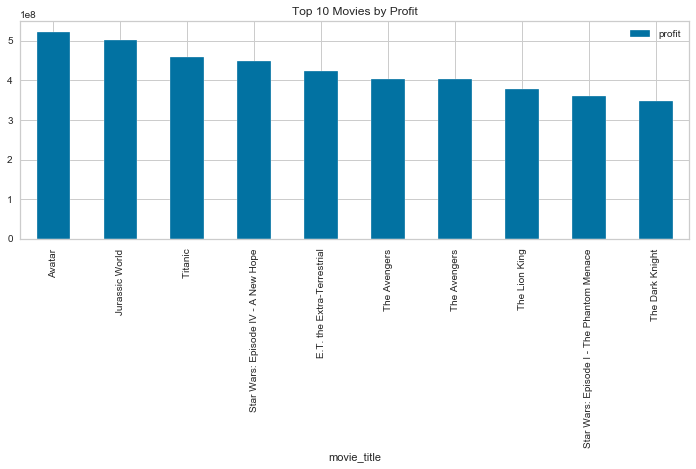

In [24]:
# Identify the top 10 most profitable movies.
top10 = movie_df.nlargest(10, 'profit')
top10.index = top10.movie_title
top10[['movie_title', 'profit']].plot.bar(figsize=(12,4), title='Top 10 Movies by Profit')

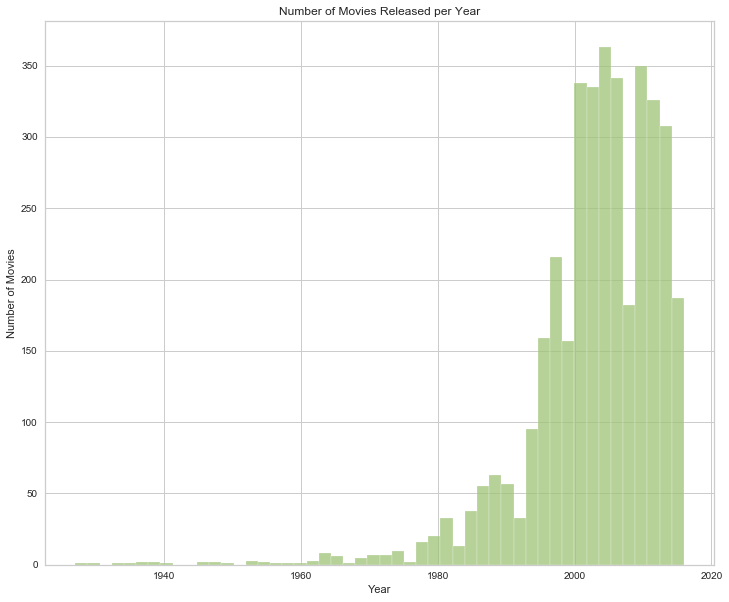

In [25]:
# Plot histogram showing movie counts by year released.
plt.figure(figsize=(12,10))
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
n, bins, patches = plt.hist(movie_df['title_year'], 50, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

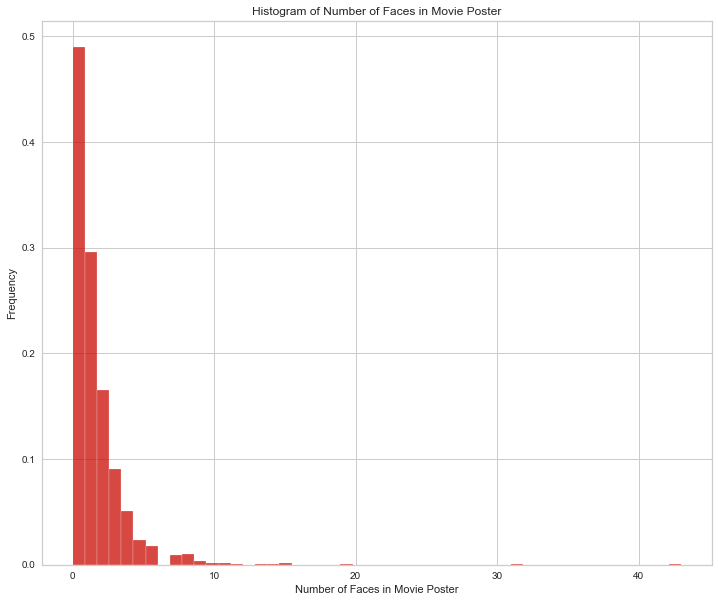

In [26]:
# Plot histogram showing movie counts by year released.
plt.figure(figsize=(12,10))
plt.title("Histogram of Number of Faces in Movie Poster")
plt.xlabel("Number of Faces in Movie Poster")
plt.ylabel("Frequency")
n, bins, patches = plt.hist(movie_df['facenumber_in_poster'], 50, density=True, facecolor='r', alpha=0.75)
plt.grid(True)
plt.show()

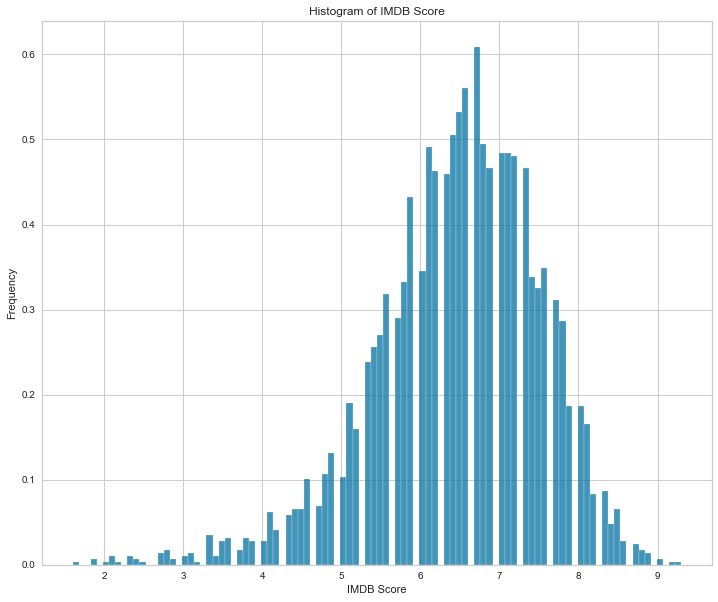

In [27]:
# Plot histogram using imdb_score frequency to check that distribution is normal.
plt.figure(figsize=(12,10))
plt.title("Histogram of IMDB Score")
plt.xlabel("IMDB Score")
plt.ylabel("Frequency")
n, bins, patches = plt.hist(movie_df['imdb_score'], 100, density=True, facecolor='b', alpha=0.75)
plt.grid(True)
plt.show()

Text(0, 0.5, 'No of movies released')

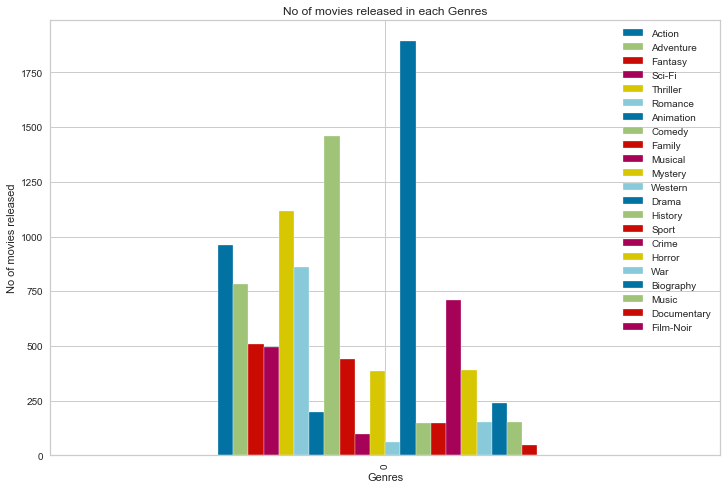

In [28]:
# Plot value counts for movie genre for all movies.

# Generate array for all genres.
Genres = []
for i in movie_df.genres:
    if type(i) == str:
        for x in i.split('|'):
            Genres.append(x)

# Create dictionary for array above
dict_genres = Counter(Genres)

# Generate bar plot using dictionary values counts and strings
df=pd.DataFrame.from_dict([dict_genres.values()])
df.columns=list(dict_genres.keys())
df.plot.bar(figsize=(12,8))
plt.title("No of movies released in each Genres")
plt.xlabel("Genres")
plt.ylabel("No of movies released")

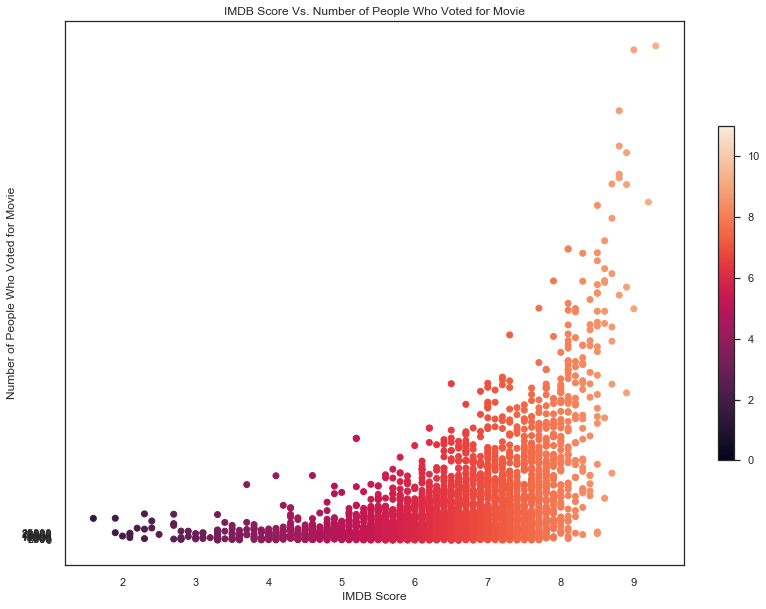

In [81]:
# Plot IMDB Score vs. Number of voted users
plt.figure(figsize=(12,10))
plt.title("IMDB Score Vs. Number of People Who Voted for Movie")
plt.xlabel("IMDB Score")
plt.ylabel("Number of People Who Voted for Movie")
tmp=plt.scatter(movie_df.imdb_score, movie_df.num_voted_users, c=movie_df.imdb_score, vmin=0, vmax=11)
plt.yticks([i*2500 for i in range(11)])
plt.colorbar(tmp, fraction=.025)
plt.show()

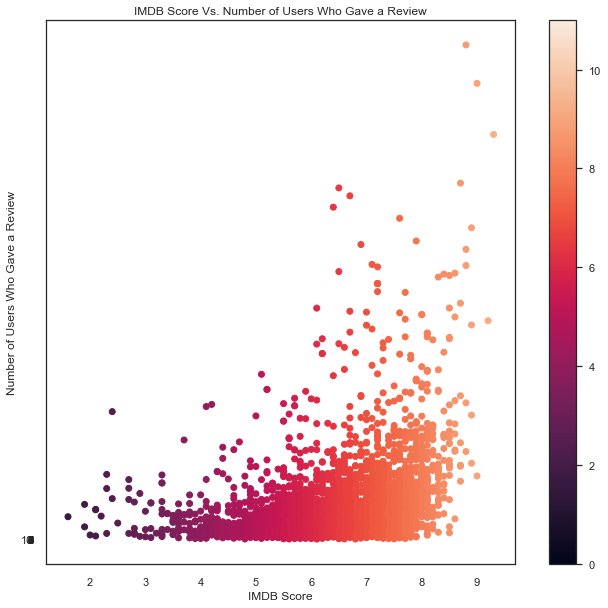

In [82]:
# Plot IMDB Score vs. Number of voted users
plt.figure(figsize=(12,10))
plt.title("IMDB Score Vs. Number of Users Who Gave a Review")
plt.xlabel("IMDB Score")
plt.ylabel("Number of Users Who Gave a Review")
tmp=plt.scatter(movie_df.imdb_score, movie_df.num_user_for_reviews, c=movie_df.imdb_score, vmin=0, vmax=11)
plt.yticks([i for i in range(11)])
plt.colorbar(tmp, fraction=.25)
plt.show()

Positive correlation between num_user_for_reviews and imdb_score.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


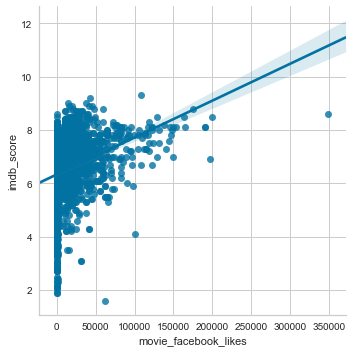

In [31]:
# Check linear regression of movie_facebook_likes and imdb_score
sns.lmplot("movie_facebook_likes", "imdb_score", movie_df, x_jitter=.15)

Clearly a positive correlation between movie_facebook_likes and imdb_score. 

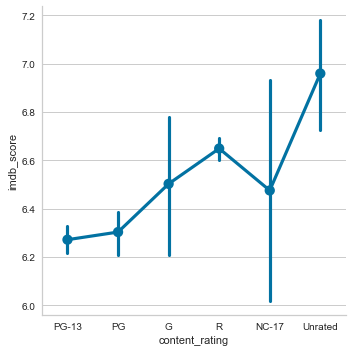

In [32]:
# catplot for content_rating and imbd_score
sns.catplot("content_rating", "imdb_score", data=movie_df, kind='point')

Interestingly enough, we find approximately a 0.8 IMDB score difference depending on the movie's content rating. It seems suprising that R would result in the highest overall score. 

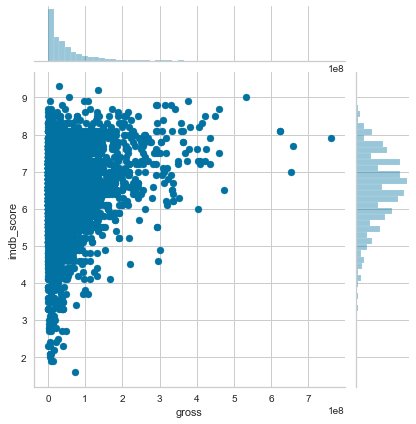

In [33]:
# Try a joint plot between gross and imdb_rating
sns.jointplot("gross", "imdb_score", movie_df)

Definitely a slight positive correlation between gross and IMDB score... makes sense.

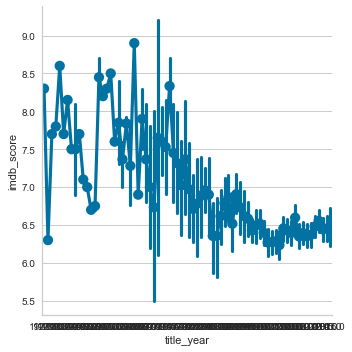

In [34]:
# catplot for production year and imbd_score
sns.catplot("title_year", "imdb_score", data=movie_df, kind='point')

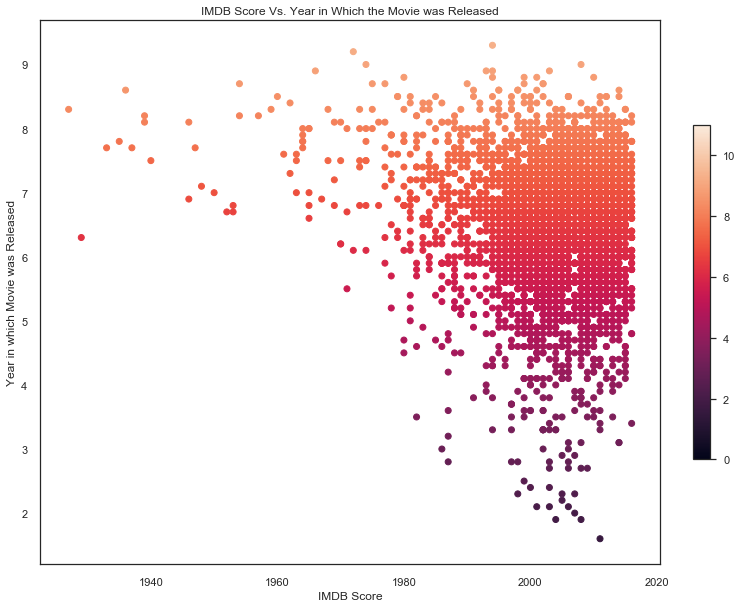

In [83]:
# Plot IMDB Score vs. Number of voted users
plt.figure(figsize=(12,10))
plt.title("IMDB Score Vs. Year in Which the Movie was Released")
plt.xlabel("IMDB Score")
plt.ylabel("Year in which Movie was Released")
tmp=plt.scatter(movie_df.title_year, movie_df.imdb_score, c=movie_df.imdb_score, vmin=0, vmax=11)
plt.colorbar(tmp, fraction=.025)
plt.show()

Ironically, it appears that film release year is negatively correlated to IMDB score...

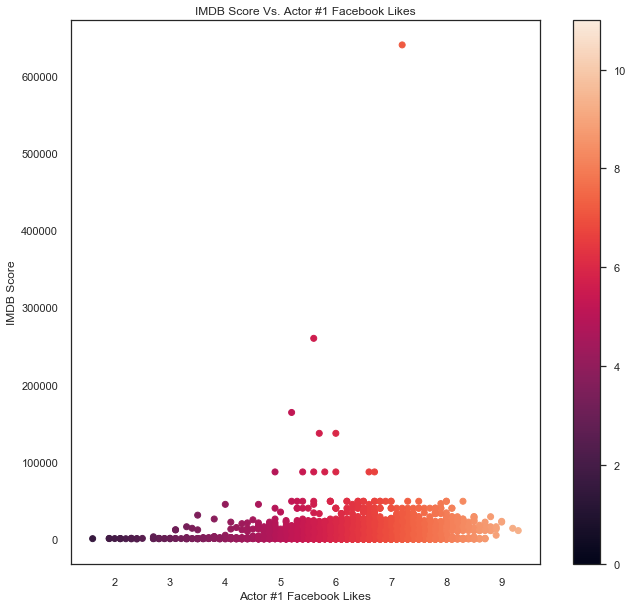

In [84]:
# Plot IMDB Score vs. actor_1_facebook_likes
plt.figure(figsize=(12,10))
plt.title("IMDB Score Vs. Actor #1 Facebook Likes")
plt.xlabel("Actor #1 Facebook Likes")
plt.ylabel("IMDB Score")
tmp=plt.scatter(movie_df.imdb_score, movie_df.actor_1_facebook_likes, c=movie_df.imdb_score, vmin=0, vmax=11)
plt.colorbar(tmp, fraction=.25)
plt.show()

It's a little difficult to say how statistically significant actor_1_facebook_likes is as a determining predictor, given the large discrepancy between values. But there does appear to be a small positive correlation. 

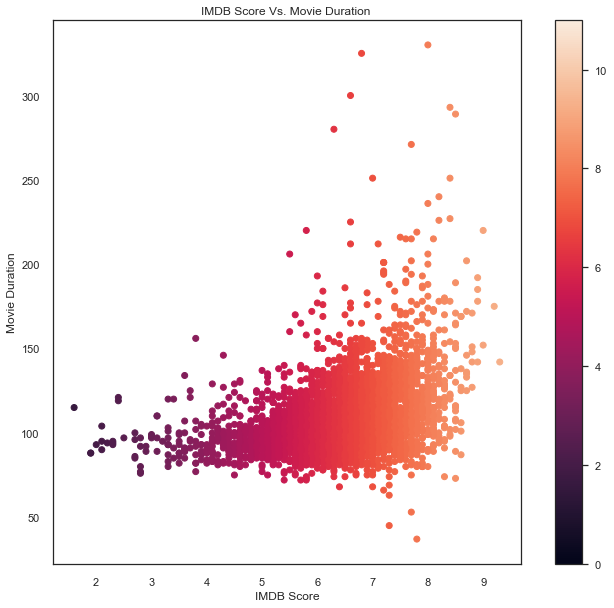

In [85]:
# Plot IMDB Score vs. duration
plt.figure(figsize=(12,10))
plt.title("IMDB Score Vs. Movie Duration ")
plt.xlabel("IMDB Score")
plt.ylabel("Movie Duration")
tmp=plt.scatter(movie_df.imdb_score, movie_df.duration, c=movie_df.imdb_score, vmin=0, vmax=11)
plt.colorbar(tmp, fraction=.25)
plt.show()

There certianly appears to be a slight positive correlation between the length of the film and its IMDB score. I find this a little supprising... but should prove useful in determining a future films IMDB score. 

(-1.515599391447989,
 1.120023837482406,
 -1.1025037656187462,
 1.1042220430640681)

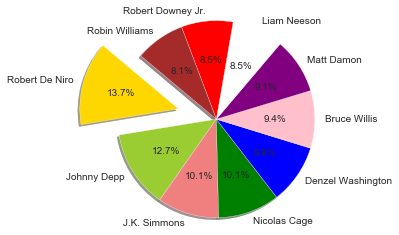

In [38]:
# pie plot - actor_1_name (more detailed)
em = movie_df.groupby('actor_1_name').size().reset_index()
em = em.rename(columns = {0: 'count'})
em = em.sort_values('count', ascending=False).head(10)

# Declar colors to be used and slices to be exploded.
colors = ['gold', 'yellowgreen', 'lightcoral', 'green', 'blue', 'pink', 'purple', 'white', 'red', 'brown']
explode = (0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Generate pie chart for percentage of movies by top 10 actors
plt.pie(em['count'], labels=em['actor_1_name'], explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Set plot axis
plt.axis('equal')

Interestingly enough, these 10 well known actors are listed as the #1 actor in a significant portion of the films included in our analysis. However, looking at the correlation between actor_1_facebook_likes and imdb_score, it makes sense that films would employ a high visibilty actor as the face of the film to drive up positive reviews. 

# 5. Exploratory Data Analysis

In [39]:
# Run full correlation analysis for movie_df.
movie_df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,Language_English,Language_Other,Country_Other,Country_UK,Country_USA,Rating_G,Rating_NC-17,Rating_PG,Rating_PG-13,Rating_R,Rating_Unrated
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.180230,0.705226,0.039029,0.032607,0.022454,-0.022454,-0.018000,0.043023,-0.015181,-0.060066,0.000396,-0.111136,0.105684,0.008413,-0.046918
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.153027,0.215303,0.008296,-0.033681,-0.049391,0.049391,0.027912,0.037166,-0.048126,-0.080780,-0.042990,-0.097460,0.063836,0.041753,-0.010910
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.037528,0.161962,0.024455,-0.006600,0.024125,-0.024125,-0.052515,-0.050375,0.077057,-0.031665,-0.014179,0.000156,0.006037,0.011023,-0.022589
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.046356,0.271508,0.052423,-0.012539,0.072461,-0.072461,-0.069206,-0.031943,0.077786,-0.029317,-0.017423,0.004490,0.097472,-0.075641,-0.039737
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.056946,0.130300,0.027904,-0.016210,0.085420,-0.085420,-0.066578,-0.027957,0.072920,-0.040077,-0.002623,-0.013282,0.056652,-0.019288,-0.052960
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.063946,0.366933,0.208033,0.017804,0.136781,-0.136781,-0.149282,-0.070222,0.168700,0.074861,-0.036534,0.148009,0.170008,-0.266339,-0.084523
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.084626,0.517751,0.126327,0.009859,0.053197,-0.053197,-0.065964,-0.005265,0.056770,0.001634,-0.023031,-0.055726,0.066515,-0.005774,-0.062535
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.068952,0.205564,0.043862,-0.019291,0.105619,-0.105619,-0.088172,-0.037810,0.097112,-0.047362,-0.011337,-0.012547,0.078873,-0.035320,-0.062858
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.018988,0.015185,0.011510,-0.013789,0.039379,-0.039379,-0.033363,-0.011699,0.034947,-0.065745,-0.010086,-0.024251,0.068317,-0.026150,-0.002289
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.098109,0.370465,0.097406,0.068445,0.051634,-0.051634,-0.032122,0.007313,0.020831,-0.042084,-0.004906,-0.092298,0.100773,-0.001331,-0.062754


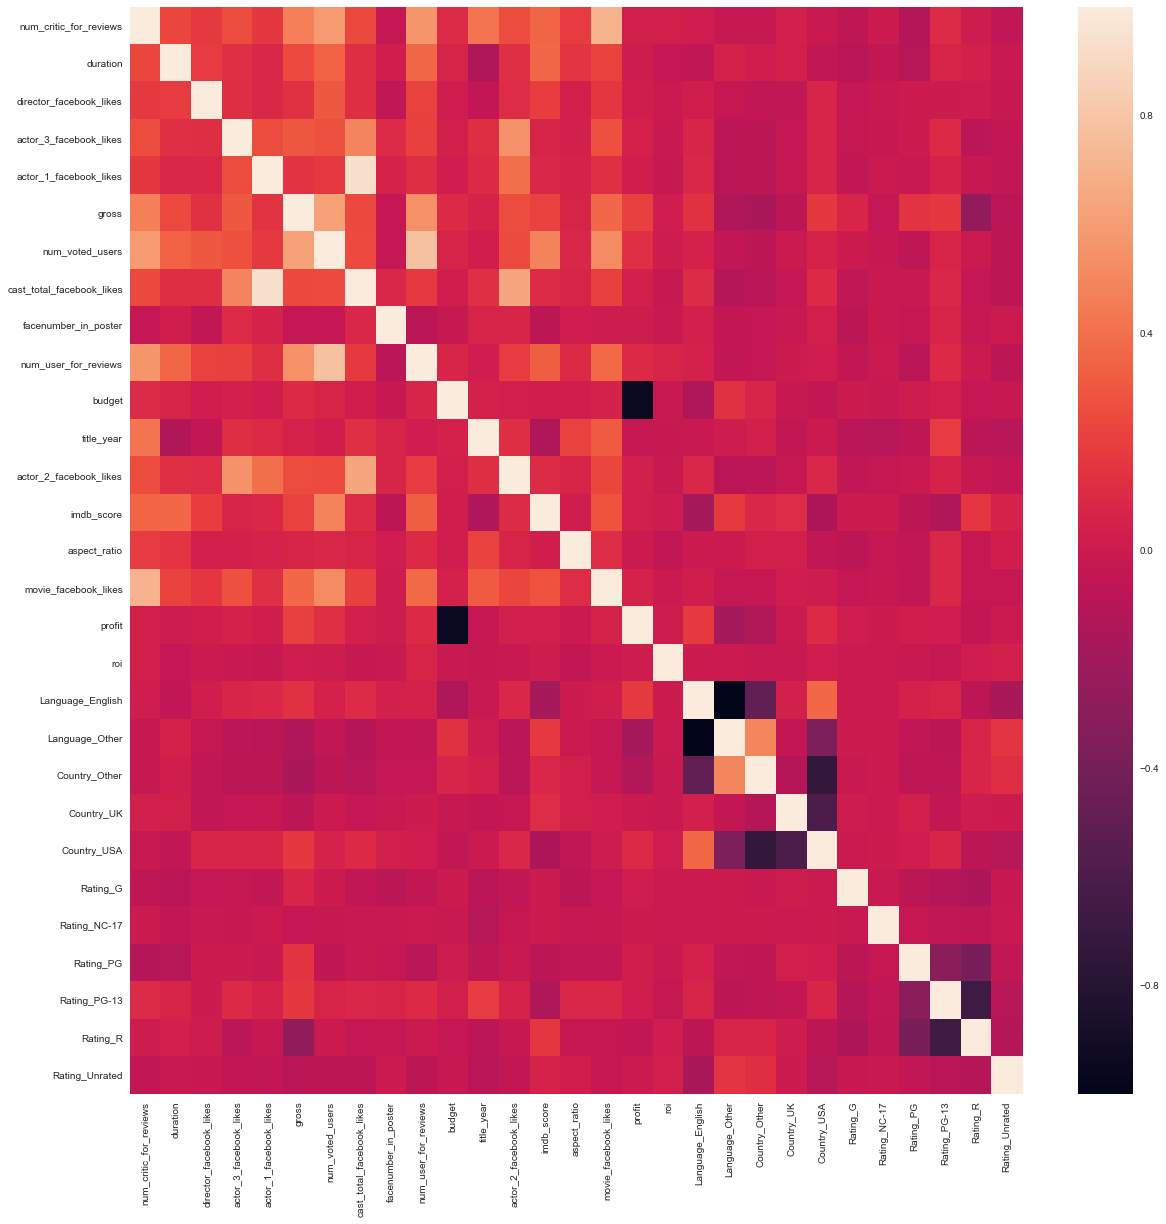

In [40]:
# Generate heatmap for better view of correlations.
plt.figure(figsize=(20, 20))
sns.heatmap(movie_df.corr())

Viewing the above analysis, there are certainly a few particularly good predictors with for which to determine a movies imdb score. The most significant predictors of imdb score include the following:

- **num_voted_users (Number of people who voted for the movie)** = 0.482 correlation

- **num_critic_for_reviews (Number of critical reviews on imdb)** = 0.348 correlation

- **duration (Duration in minutes)** = 0.366 correlation

- **num_user_for_reviews (Number of users who gave a review)** = 0.325 correlation	

- **movie_facebook_likes (Number of Facebook likes in the movie page)** = 0.281 correlation

- **Rating_R (Movies whose content rating is R)** = 0.159 correlation

- **director_facebook_likes (Number of like of the Director on his/her Facebook Page)** = 0.192 correlation

While all of these variables offer us some assistance toward predicting a movies overall IMDB score, clearly the only serious candidates include the num_voted_users, num_critic_for_reviews, duration, and num_user_for_reviews since they are all above a 0.3 correlation. This is not to say that the other correlations are not useful, but for purposes of continued analysis they are just not significant enough. Although, it certainly is interesting to find that R rated moives produced a higher correlation with IMDB score than any other content rating. Possibly a result of only adults leaving IMDB reviews?

Moving on to see which of our predictors produced a high degree of correlation to each other, we found that the following predictors were significantly correlated:

- **cast_total_facebook_likes vs. actor_1_facebook_likes** = 0.945 correlation

- **num_critic_for_reviews vs. num_voted_users** = 0.592 correlation

- **num_critic_for_reviews vs. movie_facebook_likes** = 0.705 correlation

- **num_user_for_reviews vs. num_voted_users** = 0.592 correlation

- **cast_total_facebook_likes vs. actor_2_facebook_likes** = 0.643 correlation

- **gross vs. num_voted_users** = 0.625 correlation

Looking at the (not exhausted) list of variable correlations, we find that there is clearly a very strong correlation between cast_total_facebook_likes and actor_1_facebook_likes. Additionally, there is a strong correlation between the num_critic_for_reviews and num_voted_users, considering this fact... if we plan to use the above variables as predictors of determining a movies IMDB score, we would most likely only want to include one of these variables to avoid and multi-collinary issues. It would through off our results if we were to incorporate both predictors together. 

# 6. Model Building

## Regression

### Scikit-learn

- **num_voted_users (Number of people who voted for the movie)** = 0.482 correlation

- **num_critic_for_reviews (Number of critical reviews on imdb)** = 0.348 correlation

- **duration (Duration in minutes)** = 0.366 correlation

- **num_user_for_reviews (Number of users who gave a review)** = 0.325 correlation	

- **movie_facebook_likes (Number of Facebook likes in the movie page)** = 0.281 correlation

- **Rating_R (Movies whose content rating is R)** = 0.159 correlation

- **director_facebook_likes (Number of like of the Director on his/her Facebook Page)** = 0.192 correlation


In [41]:
# Run regression using Scikit-learn (using high correlation variables)
# Assign columns to X and y variables
y = movie_df['imdb_score']
X = movie_df[['num_voted_users', 'num_critic_for_reviews', 'duration', 
             'num_user_for_reviews', 'movie_facebook_likes', 'Rating_R', 
             'director_facebook_likes']]

In [42]:
# Check y variable
y.head(2)

0    7.9
1    7.1
Name: imdb_score, dtype: float64

In [43]:
# Check X variable
X.head(2)

,num_voted_users,num_critic_for_reviews,duration,num_user_for_reviews,movie_facebook_likes,Rating_R,director_facebook_likes
0,886204,723.0,178.0,3054.0,33000,0,0.0
1,471220,302.0,169.0,1238.0,0,0,563.0


In [44]:
# Build multiple regression model
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [45]:
# Display Regression coefficients and y-intercept
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 3.54494608e-06  1.33163788e-03  1.11620042e-02 -5.84546416e-04
 -2.95756282e-06  3.15524970e-01  9.10237909e-06]
y-intercept  4.7092714391102986


In [46]:
# Display regression coefficients in dataframe
full_reg_df = pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))
print(full_reg_df)

                         0         1
0          num_voted_users  0.000004
1   num_critic_for_reviews  0.001332
2                 duration  0.011162
3     num_user_for_reviews -0.000585
4     movie_facebook_likes -0.000003
5                 Rating_R  0.315525
6  director_facebook_likes  0.000009


In [47]:
# Show in list format
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_voted_users', '0.000'),
 ('num_critic_for_reviews', '0.001'),
 ('duration', '0.011'),
 ('num_user_for_reviews', '-0.001'),
 ('movie_facebook_likes', '-0.000'),
 ('Rating_R', '0.316'),
 ('director_facebook_likes', '0.000')]

In [48]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7518451548751703
variance or r-squared:  0.3259171569156395


Looking at the Regression coefficients produced above, it appears that we may be able to produce a better (more efficient) model by removing some superfluous variables from our equation. Below we will run the scikit-learn regression again after removing 'num_critic_for_reviews', 'movie_facebook_likes', & 'director_facebook_likes'... 

In [49]:
# Run regression using Scikit-learn (using high correlation variables)
# Assign columns to X and y variables
y = movie_df['imdb_score']
X = movie_df[['num_voted_users', 'duration', 
             'num_user_for_reviews', 'Rating_R']]

In [50]:
# Check y variable
y.head(2)

0    7.9
1    7.1
Name: imdb_score, dtype: float64

In [51]:
# Check X variable
X.head(2)

,num_voted_users,duration,num_user_for_reviews,Rating_R
0,886204,178.0,3054.0,0
1,471220,169.0,1238.0,0


In [52]:
# Build regression model
model2 = lm.LinearRegression()
model2.fit(X, y)   
model2_y = model2.predict(X)

In [53]:
# Display Regression coefficients and y-intercept
print('Coefficients: ', model2.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [ 3.78472557e-06  1.11601873e-02 -4.70647890e-04  3.23057219e-01]
y-intercept  4.844852948290068


In [54]:
# Display regression coefficients in dataframe
red_reg_df = pd.DataFrame(list(zip(X.columns, np.transpose(model2.coef_))))
print(red_reg_df)

                      0         1
0       num_voted_users  0.000004
1              duration  0.011160
2  num_user_for_reviews -0.000471
3              Rating_R  0.323057


In [55]:
# Display regression coefficients in dataframe
red_reg_df = pd.DataFrame(list(zip(X.columns, np.transpose(model2.coef_))))
print(red_reg_df)

                      0         1
0       num_voted_users  0.000004
1              duration  0.011160
2  num_user_for_reviews -0.000471
3              Rating_R  0.323057


In [56]:
# Show in list format
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_voted_users', '0.000'),
 ('duration', '0.011'),
 ('num_user_for_reviews', '-0.000'),
 ('Rating_R', '0.323')]

In [57]:
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.7637995455557262
variance or r-squared:  0.3151991924451121


### Statsmodel

In [58]:
# Simplified regression model for Statsmodel
runs_reg_model = ols("imdb_score~num_voted_users+duration+num_user_for_reviews+Rating_R",movie_df)
runs_reg2 = runs_reg_model.fit()
print(runs_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     431.6
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          2.36e-306
Time:                        04:54:03   Log-Likelihood:                -4823.5
No. Observations:                3756   AIC:                             9657.
Df Residuals:                    3751   BIC:                             9688.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.8449 

Very large condition number identifies that there are multicollinearity issues...

In [59]:
# Check MSE
runs_reg2.mse_resid

0.764817673449029

In [60]:
# Display coefficients
runs_reg2.params

Intercept               4.844853
num_voted_users         0.000004
duration                0.011160
num_user_for_reviews   -0.000471
Rating_R                0.323057
dtype: float64

### Feature Selection

In [61]:
# Redefine variables to include all relevent variables...
y = movie_df['imdb_score']
X = movie_df[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
            'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 
            'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
            'num_user_for_reviews', 'budget', 'actor_2_facebook_likes', 'movie_facebook_likes', 
            'profit', 'roi', 'Language_English', 'Language_Other', 'Country_Other', 'Country_USA', 
            'Country_UK', 'Rating_G', 'Rating_NC-17', 'Rating_PG', 'Rating_PG-13', 
            'Rating_R', 'Rating_Unrated']]

In [62]:
#selec only 3 X variables
X_new = SelectKBest(f_regression, k=5).fit_transform(X, y)

In [63]:
# run code to select variables
selector = SelectKBest(f_regression, k=5).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 0  1  6  9 12]


In [64]:
# Run model 
model3 = lm.LinearRegression()
model3.fit(X_new, y)
model3_y = model3.predict(X_new)

print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  0.7772161681129254
variance or r-squared:  0.30317023273272525


### Random Forest Regression

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
y = movie_df['imdb_score'] 
X = movie_df[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
            'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 
            'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
            'num_user_for_reviews', 'budget', 'actor_2_facebook_likes', 'movie_facebook_likes', 
            'profit', 'roi', 'Language_English', 'Language_Other', 'Country_Other', 'Country_USA', 
            'Country_UK', 'Rating_G', 'Rating_NC-17', 'Rating_PG', 'Rating_PG-13', 
            'Rating_R', 'Rating_Unrated']]

# Build model
regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

# Display Regression MSE and R^2 valuesX = df.drop(['medv'], axis=1)
print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  0.06756208945686906
variance or r-squared:  0.9394993352905754


In [66]:
# Check feature importances 
sorted(zip(regr.feature_importances_, X.columns))

[(0.00027728475931825344, 'Rating_Unrated'),
 (0.0005157247254754815, 'Rating_NC-17'),
 (0.002478613922147161, 'Language_Other'),
 (0.0025949383322605097, 'Language_English'),
 (0.0027044263365686634, 'Country_Other'),
 (0.0031433075561424417, 'Country_UK'),
 (0.003539606106462316, 'Rating_G'),
 (0.003728021708672481, 'Rating_PG'),
 (0.005475250147197948, 'Country_USA'),
 (0.005815542304040844, 'Rating_R'),
 (0.01166837577575496, 'Rating_PG-13'),
 (0.01715350106166389, 'facenumber_in_poster'),
 (0.02278018293953581, 'actor_1_facebook_likes'),
 (0.02607394007031487, 'roi'),
 (0.026334222310656238, 'actor_2_facebook_likes'),
 (0.026660061125172253, 'profit'),
 (0.02698567481013487, 'cast_total_facebook_likes'),
 (0.027099779572059984, 'movie_facebook_likes'),
 (0.03320322372671167, 'director_facebook_likes'),
 (0.03399444465491566, 'actor_3_facebook_likes'),
 (0.04510594083545782, 'num_critic_for_reviews'),
 (0.0522730460919206, 'gross'),
 (0.06883665851254235, 'num_user_for_reviews'),
 

Per the above, feature selection has certianly provided the best model in terms of r-squared value and MSE. We would certianly use this model moving forward. 

## Classification

### Decision Tree

In [67]:
# Declare variables
y = pd.cut(movie_df['imdb_score'], bins=[0, 4, 6, 8, 10], include_lowest=True, labels=[1, 2, 3, 4])
X = movie_df[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
            'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 
            'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
            'num_user_for_reviews', 'budget', 'actor_2_facebook_likes', 'movie_facebook_likes', 
            'profit', 'roi']]


In [68]:
# Convert y variable info to interger. 
y = y.astype(int)

In [69]:
# Split validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.7018633540372671
--------------------------------------------------------
[[  6  13  13   0]
 [  7 181 121   0]
 [ 11 134 574  15]
 [  0   0  22  30]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.25      0.19      0.21        32
           2       0.55      0.59      0.57       309
           3       0.79      0.78      0.78       734
           4       0.67      0.58      0.62        52

   micro avg       0.70      0.70      0.70      1127
   macro avg       0.56      0.53      0.55      1127
weighted avg       0.70      0.70      0.70      1127



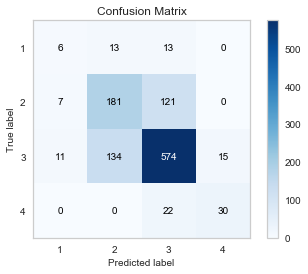

In [71]:
import scikitplot as skplt

# Display in Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

### K-Nearest Neighbor (KNN) Model

In [72]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [73]:
# Evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()   # n_neighbors=5 by default
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [74]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.6583850931677019
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        32
           2       0.37      0.24      0.29       309

   micro avg       0.37      0.22      0.27       341
   macro avg       0.12      0.08      0.10       341
weighted avg       0.33      0.22      0.26       341
 samples avg       0.07      0.07      0.07       341



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\sit

In [75]:
# evaluate the knn model using 10-fold cross-validation
scores = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.72606383 0.59574468 0.58510638 0.57446809 0.66223404 0.55851064
 0.65333333 0.68533333 0.69333333 0.74666667]
0.6480794326241135


In [76]:
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5, iid=False)

#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [77]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_score_)
print(knn_gs.best_params_)
print(knn_gs.best_estimator_)

0.6976013036393264
{'n_neighbors': 12}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')


### Random Forest Classifier

In [87]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Run Random Forest Classifier
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6947648624667259

In [89]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
#print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.6947648624667259
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        32
           2       0.45      0.05      0.08       309

   micro avg       0.45      0.04      0.08       341
   macro avg       0.15      0.02      0.03       341
weighted avg       0.41      0.04      0.07       341
 samples avg       0.01      0.01      0.01       341



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\sit

# 7. Model Selection

Reviewing the above models, it is my determination that the Random Forest Classifier provides us with the best model given that it produced the highest level of accuracy (0.6947648624667259). We would certainly like to see a higher score out of our model, but 0.7 isn't terrible. It's also worth noting that our highest correlating factors for predicting IMDB score only exhibits a 0.482 correlation and many of the variables have a high degree of multi-coliniarity. In terms of our analysis, this proves difficult for producing an appropriate regression model. 

# 8. Clustering Analysis

In [90]:
# Clustering Packages
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

### K-Means Clustering

In [92]:
movie_df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,Language_English,Language_Other,Country_Other,Country_UK,Country_USA,Rating_G,Rating_NC-17,Rating_PG,Rating_PG-13,Rating_R,Rating_Unrated
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,1,0,0,0,1,0,0,0,1,0,0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,1,0,0,0,1,0,0,0,1,0,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,1,0,0,1,0,0,0,0,1,0,0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,1,0,0,0,1,0,0,0,1,0,0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,1,0,0,0,1,0,0,0,1,0,0


In [94]:
# Normalize data and save as X
df = movie_df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 
               'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 
              'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
              'num_user_for_reviews', 'budget', 'actor_2_facebook_likes', 'imdb_score',
              'aspect_ratio', 'movie_facebook_likes', 'profit', 'roi', 'Language_English',
              'Language_Other', 'Country_Other', 'Country_UK', 'Country_USA', 'Rating_G', 
              'Rating_NC-17', 'Rating_PG', 'Rating_PG-13', 'Rating_R', 'Rating_Unrated']]

# Normalize data and save as X
X = (df - df.mean()) / (df.max() - df.min())
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,Language_English,Language_Other,Country_Other,Country_UK,Country_USA,Rating_G,Rating_NC-17,Rating_PG,Rating_PG-13,Rating_R,Rating_Unrated
0,0.685107,0.231201,-0.035102,0.003640,-0.010549,0.930819,0.461851,-0.010192,-0.032029,0.537412,0.015616,-0.007925,0.186327,-0.022336,0.067754,0.040601,-0.000446,0.042066,-0.042066,-0.120075,-0.084665,0.204739,-0.023163,-0.00426,-0.151491,0.651757,-0.457934,-0.014909
1,0.165995,0.200485,-0.010623,0.009944,0.050389,0.337659,0.216251,0.056070,-0.032029,0.178235,0.020774,0.021739,0.082431,0.016126,-0.026802,0.000238,-0.000749,0.042066,-0.042066,-0.120075,-0.084665,0.204739,-0.023163,-0.00426,-0.151491,0.651757,-0.457934,-0.014909
2,0.535908,0.128812,-0.035102,-0.026534,0.005076,0.193899,0.100636,0.000263,-0.008774,0.129976,0.016271,-0.011889,0.043470,0.016126,0.216751,-0.004028,-0.000778,0.042066,-0.042066,-0.120075,0.915335,-0.795261,-0.023163,-0.00426,-0.151491,0.651757,-0.457934,-0.014909
3,0.796081,0.183420,0.921420,0.966466,0.030076,0.520072,0.614622,0.145009,-0.032029,0.467594,0.016681,0.153126,0.264249,0.016126,0.443112,0.015055,-0.000643,0.042066,-0.042066,-0.120075,-0.084665,0.204739,-0.023163,-0.00426,-0.151491,0.651757,-0.457934,-0.014909
5,0.363282,0.074205,-0.014449,-0.010490,-0.011111,0.026885,0.062957,-0.014700,-0.008774,0.079343,0.017802,-0.010144,0.017496,0.016126,0.041966,-0.015468,-0.000853,0.042066,-0.042066,-0.120075,-0.084665,0.204739,-0.023163,-0.00426,-0.151491,0.651757,-0.457934,-0.014909


In [95]:
# Test variance of each column
X.var()

num_critic_for_reviews       0.023172
duration                     0.005974
director_facebook_likes      0.017795
actor_3_facebook_likes       0.006783
actor_1_facebook_likes       0.000588
gross                        0.008549
num_voted_users              0.008096
cast_total_facebook_likes    0.000848
facenumber_in_poster         0.002254
num_user_for_reviews         0.006615
budget                       0.000342
actor_2_facebook_likes       0.001101
imdb_score                   0.018817
aspect_ratio                 0.000568
movie_facebook_likes         0.003782
profit                       0.000326
roi                          0.000336
Language_English             0.040307
Language_Other               0.040307
Country_Other                0.105685
Country_UK                   0.077517
Country_USA                  0.162864
Rating_G                     0.022632
Rating_NC-17                 0.004243
Rating_PG                    0.128576
Rating_PG-13                 0.227030
Rating_R    

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

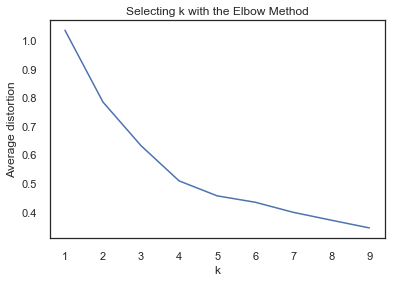

In [96]:
# Perform the Elbow method
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

Based on the above, k=5 should be appropriate for our analysis...

In [97]:
# Clustering analysis with k = 5
k_means = KMeans(init='k-means++', n_clusters=5, random_state=0)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [98]:
# Clustering results
k_means.labels_

array([2, 2, 3, ..., 2, 1, 4])

In [99]:
# cluster centroids
k_means.cluster_centers_

array([[-7.41638920e-03,  5.83949028e-03, -1.89617058e-02,
        -1.54273670e-02, -4.36984041e-03, -3.73602500e-02,
        -1.60652314e-02, -6.94898253e-03, -4.28740441e-03,
        -7.07169550e-03,  3.71749089e-03, -6.61509536e-03,
         3.01372768e-02,  2.43012469e-03, -4.46690914e-03,
        -5.79609211e-03, -6.32942530e-04, -2.68355258e-01,
         2.68355258e-01,  8.79925453e-01, -8.46645367e-02,
        -7.95260916e-01, -3.20728520e-03,  1.74738895e-04,
        -5.61472671e-02, -7.77328337e-02,  9.63897527e-02,
         4.05228943e-02],
       [ 1.43478316e-04,  1.75043593e-03,  8.65139724e-03,
        -3.56404468e-03,  3.86771681e-04, -2.05601317e-02,
         1.72977877e-03,  3.72051424e-04, -7.98120732e-04,
         1.05160340e-03, -1.71256487e-03,  9.93722308e-04,
         1.44215005e-02, -1.41490239e-03, -1.60088453e-03,
         4.14840225e-04,  7.33021290e-04,  3.44787743e-02,
        -3.44787743e-02, -1.20074547e-01, -8.46645367e-02,
         2.04739084e-01, -2.31

In [100]:
# Add Clustering label to each dataset as a column
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,2
1,2
2,3
3,2
4,2


In [101]:
# Joing dataframe df and df1
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,Language_English,Language_Other,Country_Other,Country_UK,Country_USA,Rating_G,Rating_NC-17,Rating_PG,Rating_PG-13,Rating_R,Rating_Unrated,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000,523505847.0,220.888543,1,0,0,0,1,0,0,0,1,0,0,2
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0,9404152.0,3.134717,1,0,0,0,1,0,0,0,1,0,0,2
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,1,0,0,1,0,0,0,0,1,0,0,3
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,1,0,0,0,1,0,0,0,1,0,0,2
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,1,0,0,0,1,0,0,0,1,0,0,2


In [102]:
# Check end of joined dataframe to confirm full population.
df2.tail()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,Language_English,Language_Other,Country_Other,Country_UK,Country_USA,Rating_G,Rating_NC-17,Rating_PG,Rating_PG-13,Rating_R,Rating_Unrated,cluster
3751,81.0,110.0,107.0,45.0,576.0,136007.0,3924,776,1.0,39.0,4500.0,133.0,6.9,2.35,171,131507.0,2922.377778,0,1,1,0,0,0,0,0,0,1,0,0
3752,64.0,90.0,397.0,0.0,5.0,673780.0,4555,5,0.0,26.0,10000.0,0.0,7.5,1.85,697,663780.0,6637.800000,0,1,1,0,0,0,0,0,0,0,1,0
3753,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,7000.0,45.0,7.0,1.85,19000,417760.0,5968.000000,1,0,0,0,1,0,0,0,1,0,0,2
3754,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,7000.0,20.0,6.9,1.37,0,2033920.0,29056.000000,0,1,0,0,1,0,0,0,0,1,0,1
3755,43.0,90.0,16.0,16.0,86.0,85222.0,4285,163,0.0,84.0,1100.0,23.0,6.6,1.85,456,84122.0,7647.454545,1,0,0,0,1,0,0,1,0,0,0,4


### K-Means Clustering Visualization

In [103]:
# groupby mean
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,Language_English,Language_Other,Country_Other,Country_UK,Country_USA,Rating_G,Rating_NC-17,Rating_PG,Rating_PG-13,Rating_R,Rating_Unrated
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,161.363636,111.968958,371.217295,416.450111,4954.640798,2.420014e+07,78681.745011,6963.496674,1.192905,301.088692,9.164786e+07,1115.507761,6.697339,2.147029,7794.878049,-6.744772e+07,86.352649,0.689579,0.310421,1.0,0.0,0.0,0.019956,0.004435,0.095344,0.270510,0.554324,0.055432
1,167.494689,110.770865,1006.318665,689.306525,7998.872534,3.697673e+07,108749.493171,11771.439302,1.342944,342.160091,2.531701e+07,2157.915781,6.576328,2.090046,8795.120637,1.165971e+07,1069.093340,0.992413,0.007587,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,182.653285,111.983577,924.843066,1096.258212,9404.771898,7.328052e+07,122569.033759,14392.109489,1.623175,392.038321,5.424369e+07,2575.790146,6.201642,2.143403,11872.148723,1.903682e+07,85.879040,0.997263,0.002737,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
3,184.839623,113.025157,299.207547,572.352201,6324.915094,3.637899e+07,103194.987421,9150.110063,1.298742,346.729560,3.142814e+07,1557.226415,6.856918,2.150440,10456.783019,4.950851e+06,88.092412,0.987421,0.012579,0.0,1.0,0.0,0.028302,0.003145,0.191824,0.283019,0.477987,0.015723
4,132.937173,102.895288,750.144852,727.912740,7012.247818,8.041922e+07,89906.181501,10396.184991,1.174520,241.694590,5.151721e+07,1620.068063,6.314136,2.047068,6436.984293,2.890201e+07,810.753635,0.998255,0.001745,0.0,0.0,1.0,0.120419,0.022688,0.811518,0.000000,0.000000,0.045375


In [104]:
# groupby cluster size
df2.groupby('cluster').size()

cluster
0     451
1    1318
2    1096
3     318
4     573
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


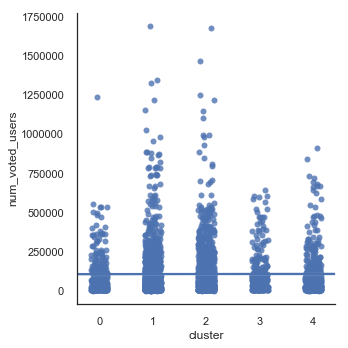

In [105]:
# Plot clusters by num_voted_users
sns.lmplot("cluster", "num_voted_users", df2, x_jitter=.15, y_jitter=.15)

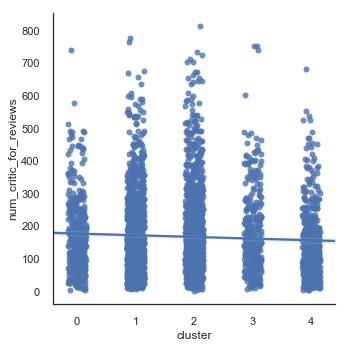

In [106]:
# Plot clusters by num_critic_for_reviews
sns.lmplot("cluster", "num_critic_for_reviews", df2, x_jitter=.15, y_jitter=.15)

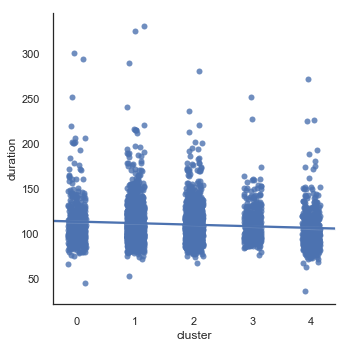

In [107]:
# Plot clusters by duration
sns.lmplot("cluster", "duration", df2, x_jitter=.15, y_jitter=.15)

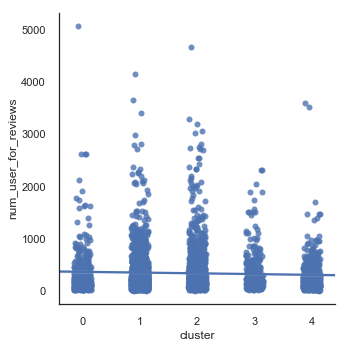

In [108]:
# Plot clusters by num_user_for_reviews
sns.lmplot("cluster", "num_user_for_reviews", df2, x_jitter=.15, y_jitter=.15)

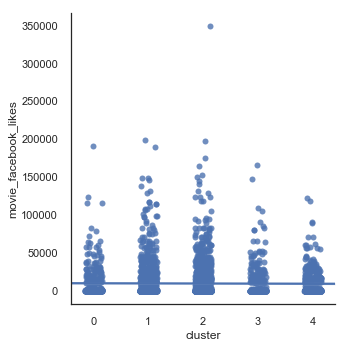

In [109]:
# Plot clusters by movie_facebook_likes
sns.lmplot("cluster", "movie_facebook_likes", df2, x_jitter=.15, y_jitter=.15)

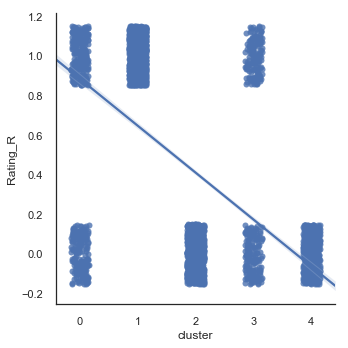

In [110]:
# Plot clusters by Rating_R
sns.lmplot("cluster", "Rating_R", df2, x_jitter=.15, y_jitter=.15)

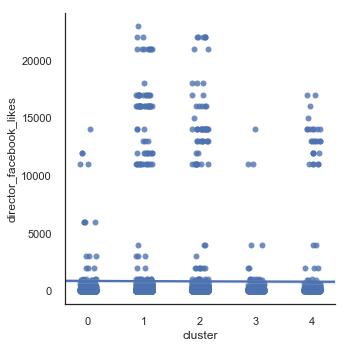

In [111]:
# Plot clusters by director_facebook_likes
sns.lmplot("cluster", "director_facebook_likes", df2, x_jitter=.15, y_jitter=.15)

Text(0.5, 0, 'num_critic_for_reviews')

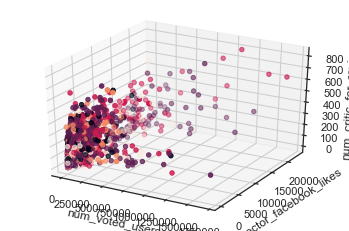

In [112]:
# Generate 3D plot using the largest cluster separations....
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df2['num_voted_users']
y = df2['director_facebook_likes']
z = df2['num_critic_for_reviews'] 
colors = df2['cluster']

ax.scatter(x, y, z, c=colors, marker='o')
ax.set_xlabel('num_voted_users')
ax.set_ylabel('director_facebook_likes')
ax.set_zlabel('num_critic_for_reviews')

Difficult to interpret much from the 3D plot...

### Hierarchical (Agglomerative) Clustering Algorithm

In [113]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [116]:
# disply X dataframe again for check before use in clustering
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,Language_English,Language_Other,Country_Other,Country_UK,Country_USA,Rating_G,Rating_NC-17,Rating_PG,Rating_PG-13,Rating_R,Rating_Unrated
0,0.685107,0.231201,-0.035102,0.003640,-0.010549,0.930819,0.461851,-0.010192,-0.032029,0.537412,0.015616,-0.007925,0.186327,-0.022336,0.067754,0.040601,-0.000446,0.042066,-0.042066,-0.120075,-0.084665,0.204739,-0.023163,-0.00426,-0.151491,0.651757,-0.457934,-0.014909
1,0.165995,0.200485,-0.010623,0.009944,0.050389,0.337659,0.216251,0.056070,-0.032029,0.178235,0.020774,0.021739,0.082431,0.016126,-0.026802,0.000238,-0.000749,0.042066,-0.042066,-0.120075,-0.084665,0.204739,-0.023163,-0.00426,-0.151491,0.651757,-0.457934,-0.014909
2,0.535908,0.128812,-0.035102,-0.026534,0.005076,0.193899,0.100636,0.000263,-0.008774,0.129976,0.016271,-0.011889,0.043470,0.016126,0.216751,-0.004028,-0.000778,0.042066,-0.042066,-0.120075,0.915335,-0.795261,-0.023163,-0.00426,-0.151491,0.651757,-0.457934,-0.014909
3,0.796081,0.183420,0.921420,0.966466,0.030076,0.520072,0.614622,0.145009,-0.032029,0.467594,0.016681,0.153126,0.264249,0.016126,0.443112,0.015055,-0.000643,0.042066,-0.042066,-0.120075,-0.084665,0.204739,-0.023163,-0.00426,-0.151491,0.651757,-0.457934,-0.014909
5,0.363282,0.074205,-0.014449,-0.010490,-0.011111,0.026885,0.062957,-0.014700,-0.008774,0.079343,0.017802,-0.010144,0.017496,0.016126,0.041966,-0.015468,-0.000853,0.042066,-0.042066,-0.120075,-0.084665,0.204739,-0.023163,-0.00426,-0.151491,0.651757,-0.457934,-0.014909


In [117]:
np.random.seed(1) # setting random seed to get the same results each time

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([3, 3, 0, ..., 3, 0, 1], dtype=int64)

### Hierarchical (Agglomerative) Clustering Visualization

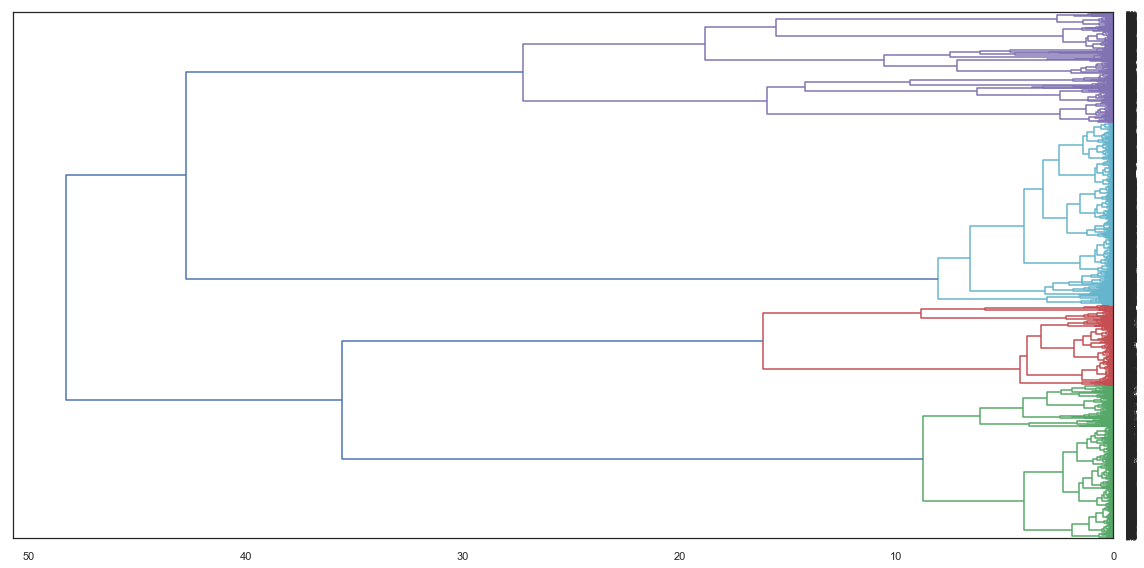

In [118]:
# Display plot
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

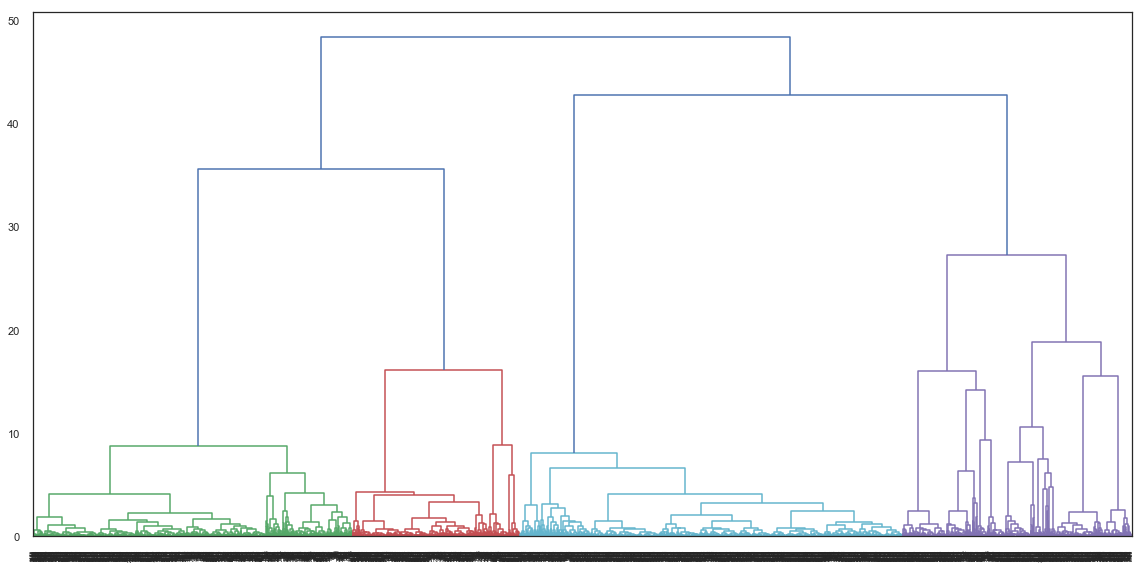

In [119]:
# Transpose Plot to top to bottom
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

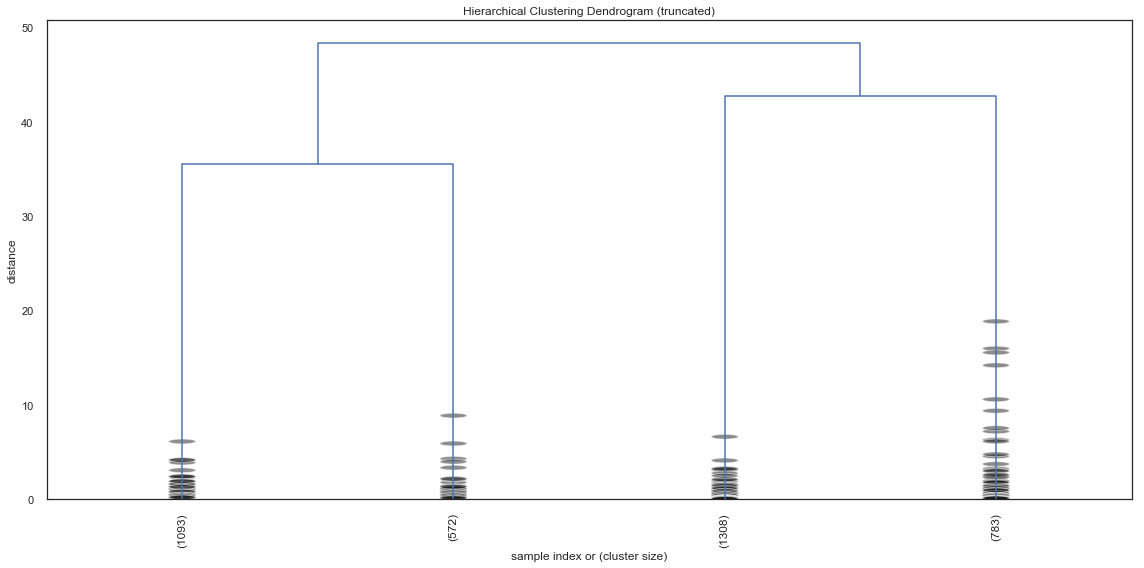

In [120]:
# Update Plot
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


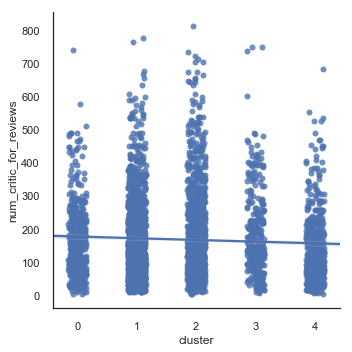

In [123]:
# Plot cluster vs. num_critic_for_reviews
sns.lmplot("cluster", "num_critic_for_reviews", df2, x_jitter=.15, y_jitter=.15)

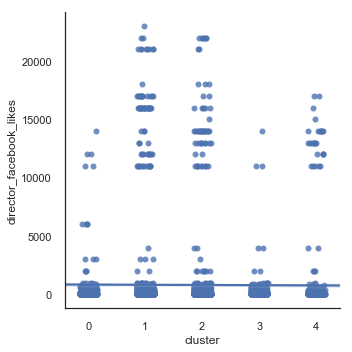

In [124]:
# Plot cluster vs. director_facebook_likes
sns.lmplot("cluster", "director_facebook_likes", df2, x_jitter=.15, y_jitter=.15)

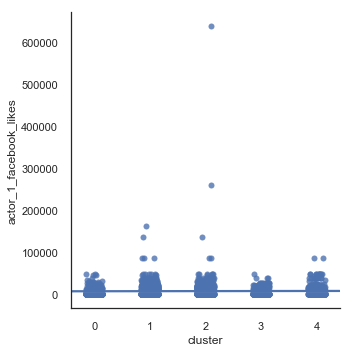

In [125]:
# Plot cluster vs. actor_1_facebook_likes
sns.lmplot("cluster", "actor_1_facebook_likes", df2, x_jitter=.15, y_jitter=.15)

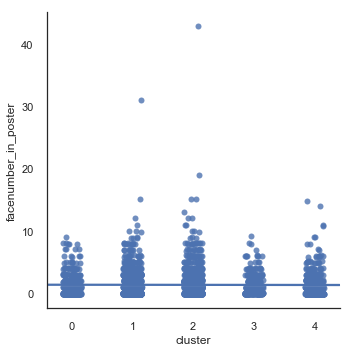

In [126]:
# Plot cluster vs. facenumber_in_poster
sns.lmplot("cluster", "facenumber_in_poster", df2, x_jitter=.15, y_jitter=.15)

# 9. Final Analysis and Storytelling

I want to start off by saying that it is an extremely tedious process to analyze specific markers required to make an effective analysis of the particular factors that predict movie success given the unlimited number of factors that play into an equation such as that. Basing our analysis solely on the factors directly within the production company’s control doesn't account for cross cultural factors effecting each individual living withing the society. Economic factors for example, falling or stagnant wages have been well documented by the working class for the last the 30-40 years, which certainly has an effect on the number of people buying of even viewing movies given their capacity to procure them which then spills over into the number of reviews generated affecting the 'quality' of our analysis and so on. It suffices to say that cross variable studies of a large magnitude are incredibly sensitive and only allow for realistically determining correlations and trends as they cannot account for all factors.

**Regression:**

Looking at our regression analysis above, its clear that the Random Forest Reggression produces is by far the best regression equation produced using all numeric and categorical data. This regresion produced an R-squared value of 0.939499 (or 93.95% ) which is very high offering a great means of predicting movie success. However, we should also note that this is a huge equation... using approximately 15 factos ultimately producing a high degree of multi-collinearity. Baring the issues stated, this a relatively good model for our analysis. 

**Classification:**

As for the classification analysis, unexpectedly our best model is the decision tree producing an overall accuraccy of 0.70186. This isn't terrible, but certainly could be improved upon. 

**Clustering:**

Looking at our clusstering analysis, its difficult for me to draw any meaningful conclussions form the visualization section. With the exception of clustering of binary dummy varriables, there doesn't appear to be any significant deviations betweeen the clusters when looking at our highest correlation variables. However, we can certainly see that the binary variables offer clear seperation per cluster... obviously. If I had more time, I think I could improve our clustering analysis by isolating only the highest and lowest IMDB variables which should give us a larger variation in the most important factors, giving us a tighter clustering. This would allow us to draw more meaningful conclusions in regards to the clustering analysis.

If I were to perform this analysis again prescribing different factors for analysis. I would certainly intensify the amount of information I gathered on both the actors/actresses and the director. Facebook likes to me notes that there is a correlation between the number of people aware of who there are. But I would like to know how they got there and analyze a multitude of those factors including awards, salary, etc.


# Sources

Grand View Research - https://www.grandviewresearch.com/industry-analysis/movies-entertainment-market

*(Article reviewed in section 1.1)*
Sentiment Analysis for Movie Reviews - https://cseweb.ucsd.edu/classes/wi15/cse255-a/reports/fa15/003.pdf

*(Article reviewed in section 1.2)*
Predictive Movie Success with Data Analytics - https://storyfit.com/using-analytics-to-predict-movie-success/

*(Article reviewed in section 1.3)*
A Data Mining Approach to Analysis and Prediction of Movie Ratings - https://storyfit.com/using-analytics-to-predict-movie-success/

Online Reviews Are Biased. Here’s How to Fix Them - https://hbr.org/2018/03/online-reviews-are-biased-heres-how-to-fix-them